In [4]:
import json

from autogen import config_list_from_json
from autogen import AssistantAgent, UserProxyAgent, GroupChat, GroupChatManager

llm_config = config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={"model": ["gpt-4"]},
)[0]
llm_config["seed"] = 42

coder = AssistantAgent(name="coder", llm_config=llm_config)
user = UserProxyAgent(name="user", code_execution_config={
    "work_dir": "/tmp/coding"
},
is_termination_msg=lambda x: "TERMINATE" in x.get("content"),
human_input_mode="NEVER")
pm = AssistantAgent(name="pm", llm_config=llm_config, system_message="Suggest creative ideas based on paper abstracts")

groupchat = GroupChat(agents=[user, coder, pm], messages=[], max_round=50)
manager = GroupChatManager(groupchat=groupchat, llm_config=llm_config)

user.initiate_chat(manager, message="Find latest paper about GPT-4 on arxiv.")

chat_history = coder.chat_messages[user]

user (to chat_manager):

Find latest paper about GPT-4 on arxiv.

--------------------------------------------------------------------------------


coder (to chat_manager):

We can use the `arxiv` Python package for interacting with the arXiv API. The following code should fetch us the most recent papers about GPT-4.

Before we start, make sure you have the `arxiv` package installed. To install it, you can use the command `pip install arxiv`. Once you've done that, we can proceed to use it.

```python
# python
import arxiv

# Define the search query
query = "GPT-4"

# Search arXiv for the query
search = arxiv.Search(
  query = query,
  max_results = 10,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

# Print the title and link of the most recent paper
for result in search.get():
  print(f"Title: {result.title}\nLink: {result.entry_id}")
  print("\n--------------\n")
```

This script will print out the titles and links of the most recent 10 papers about GPT-4.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...


user (to chat_manager):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "", line 15, in <module>
    for result in search.get():
AttributeError: 'Search' object has no attribute 'get'


--------------------------------------------------------------------------------
coder (to chat_manager):

I apologize for the misunderstanding. The 'Search' object in the 'arxiv' package is iterable directly and does not contain a '.get()' method. Here is a corrected version of the script:

```python
# python
import arxiv

# Define the search query
query = "GPT-4"

# Search arXiv for the query
search = arxiv.Search(
  query = query,
  max_results = 10,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

# Print the title and link of the most recent paper
for result in search.results():
  print(f"Title: {result.title}\nLink: {result.entry_id}")
  print("\n--------------\n")
```

This script will print out the titles and links of the most recent 10 papers about GPT-4.

user (to chat_manager):

exitcode: 0 (execution succeeded)
Code output: 
Title: Using GPT-4 Prompts to Determine Whether Articles Contain Functional Evidence Supporting or Refuting Variant Pathogenicity
Link: http://arxiv.org/abs/2312.13521v1

--------------

Title: Benchmarking and Analyzing In-context Learning, Fine-tuning and Supervised Learning for Biomedical Knowledge Curation: a focused study on chemical entities of biological interest
Link: http://arxiv.org/abs/2312.12989v1

--------------

Title: Can Large Language Models Identify And Reason About Security Vulnerabilities? Not Yet
Link: http://arxiv.org/abs/2312.12575v1

--------------

Title: NoMIRACL: Knowing When You Don't Know for Robust Multilingual Retrieval-Augmented Generation
Link: http://arxiv.org/abs/2312.11361v1

--------------

Title: LLM-ARK: Knowledge Graph Reasoning Using Large Language Models via Deep Reinforcement Learning
Link: http://arxiv.org/abs/2312.11282v1

--------------

Title: MAC-SQL: Multi-Agent Col

In [5]:
chat_history = manager.chat_messages[coder]
print(json.dumps(chat_history, indent=2))

[
  {
    "content": "Find latest paper about GPT-4 on arxiv.",
    "name": "user",
    "role": "assistant"
  },
  {
    "content": "We can use the `arxiv` Python package for interacting with the arXiv API. The following code should fetch us the most recent papers about GPT-4.\n\nBefore we start, make sure you have the `arxiv` package installed. To install it, you can use the command `pip install arxiv`. Once you've done that, we can proceed to use it.\n\n```python\n# python\nimport arxiv\n\n# Define the search query\nquery = \"GPT-4\"\n\n# Search arXiv for the query\nsearch = arxiv.Search(\n  query = query,\n  max_results = 10,\n  sort_by = arxiv.SortCriterion.SubmittedDate\n)\n\n# Print the title and link of the most recent paper\nfor result in search.get():\n  print(f\"Title: {result.title}\\nLink: {result.entry_id}\")\n  print(\"\\n--------------\\n\")\n```\n\nThis script will print out the titles and links of the most recent 10 papers about GPT-4.",
    "role": "user",
    "name":

[
  {
    "content": "Find latest paper about GPT-4 on arxiv.",
    "name": "user",
    "role": "assistant",
    "codes": [
      "USER_REQUEST"
    ]
  },
  {
    "content": "We can use the `arxiv` Python package for interacting with the arXiv API. The following code should fetch us the most recent papers about GPT-4.\n\nBefore we start, make sure you have the `arxiv` package installed. To install it, you can use the command `pip install arxiv`. Once you've done that, we can proceed to use it.\n\n```python\n# python\nimport arxiv\n\n# Define the search query\nquery = \"GPT-4\"\n\n# Search arXiv for the query\nsearch = arxiv.Search(\n  query = query,\n  max_results = 10,\n  sort_by = arxiv.SortCriterion.SubmittedDate\n)\n\n# Print the title and link of the most recent paper\nfor result in search.get():\n  print(f\"Title: {result.title}\\nLink: {result.entry_id}\")\n  print(\"\\n--------------\\n\")\n```\n\nThis script will print out the titles and links of the most recent 10 papers abo

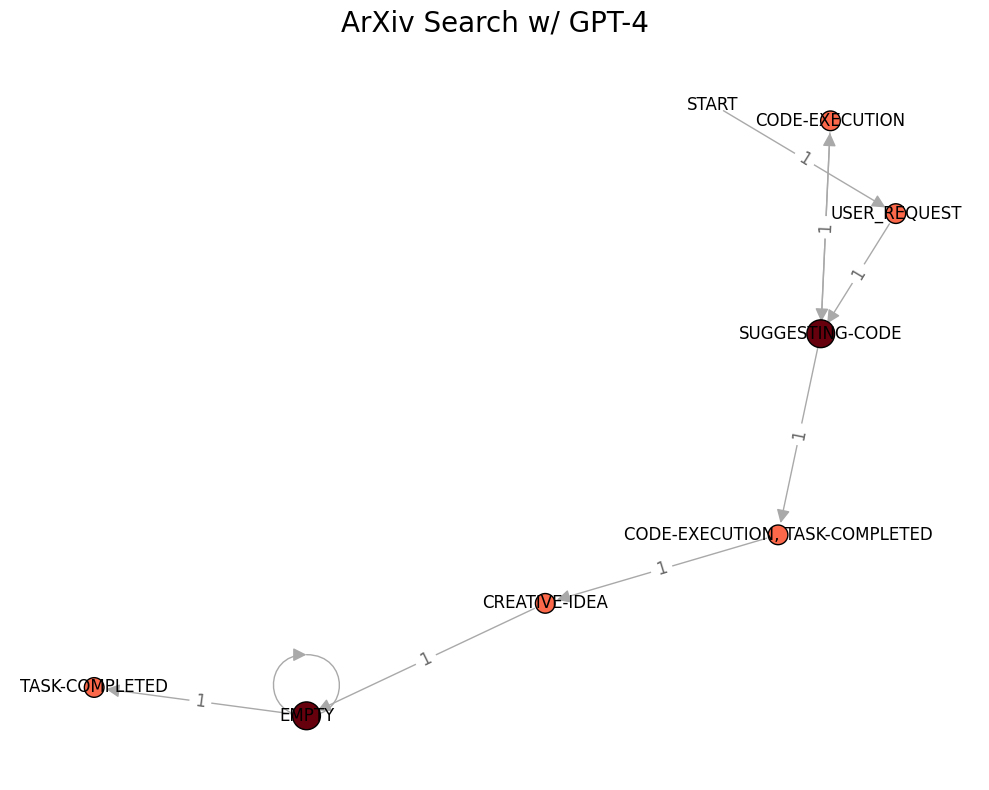

In [6]:
# visualization with collate codes is true

from autogen.agentchat.contrib.profiler import annotate_chat_history, draw_profiler_graph

state_space = [
    {
        "name": "USER_REQUEST",
        "description": "The message shows the *user* requesting a task that needs to be completed",
        "valid_roles": ["user"],
    },
    {
        "name": "SUGGESTING-CODE",
        "description": "The assistant is suggesting code",
        "valid_roles": ["coder"],
    },
    {
        "name": "CODE-EXECUTION",
        "description": "The user shared results of code execution, e.g., results, logs, error trace",
        "valid_roles": ["user"],
    },
    {
        "name": "TASK-COMPLETED",
        "description": "The message from either user or assistant indicates that provided task was completed or the goal was accomplished, e.g., this maybe indicated through successful code execution, TERMINATE messsages, etc",
        "valid_roles": ["user", "coder"],
    },
    {
        "name": "EMPTY",
        "description": "The message is empty",
        "valid_roles": ["user"],
    },
    {
        "name": "CREATIVE-IDEA",
        "description": "The message is a creative idea",
        "valid_roles": ["pm"],
    }
]

# Annotate chat history
annotated_chat_history = annotate_chat_history(chat_history, state_space=state_space, llm_config=llm_config, collate_codes=True)

print(json.dumps(annotated_chat_history, indent=2))

# Visualize annotated chat history
draw_profiler_graph(
    annotated_chat_history,
    title="ArXiv Search w/ GPT-4",
    output_dir="/tmp",
    filename="profiler_graph.png",
)